In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [6]:
X = df.drop(columns=['Transported'])
y = df['Transported']

<Axes: xlabel='Transported'>

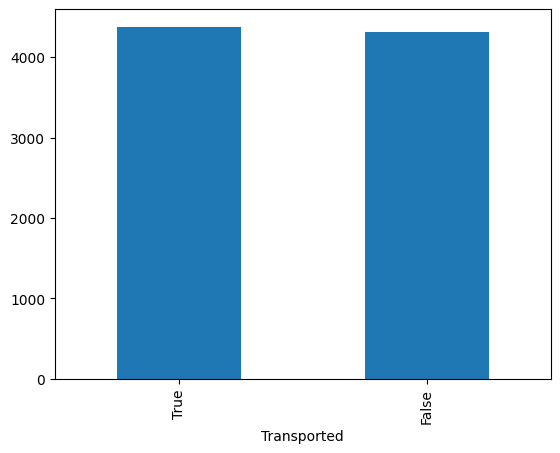

In [7]:
y.value_counts().plot(kind='bar')

Классы распределены одинаково, семплирование не требуется

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

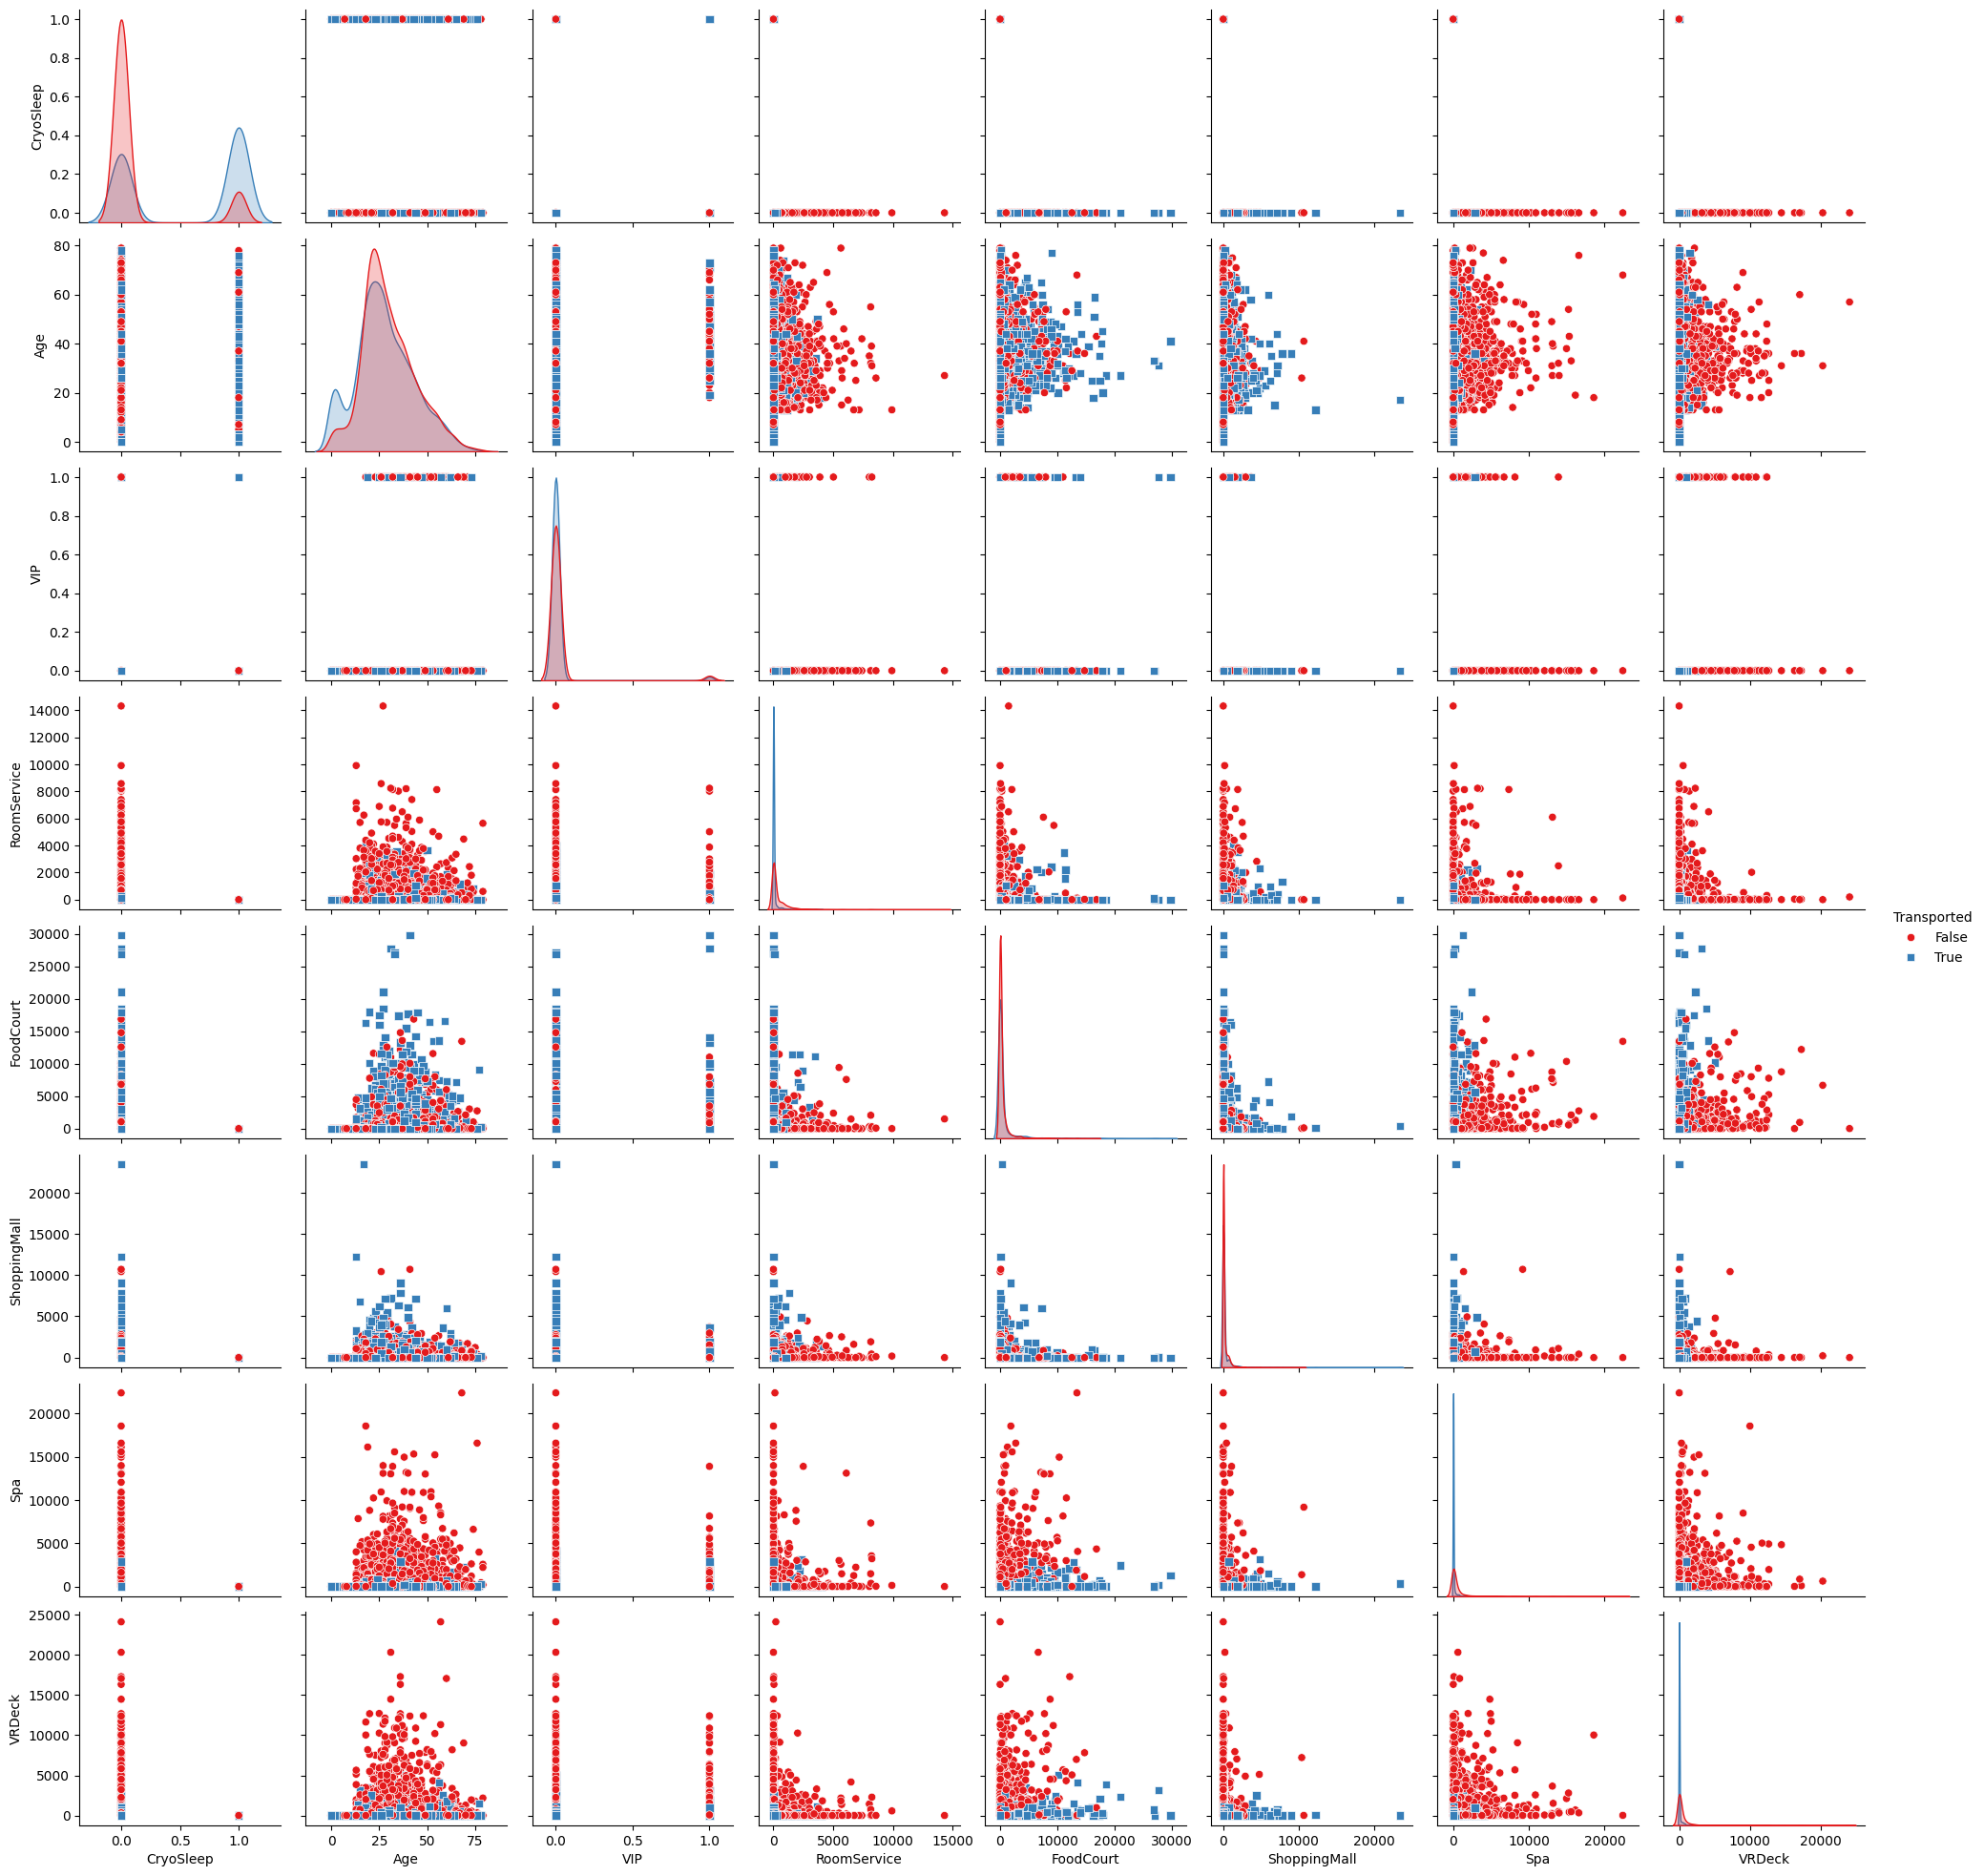

In [9]:
sns.pairplot(df, hue='Transported', diag_kind='kde', markers=["o", "s"], palette="Set1")

In [12]:
X.select_dtypes(include=['object']).nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [13]:
X = X.drop(columns=['PassengerId', 'Name', 'Cabin'])

In [14]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [ ]:
hot_objects = X.select_dtypes(include=['object']).columns
hot_objects

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype='object')

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

In [24]:
ohe.fit(X[hot_objects])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [25]:
ohe.feature_names_in_

array(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype=object)

In [29]:
feature_ohe_names = ohe.get_feature_names_out()
feature_ohe_names

array(['HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_nan',
       'CryoSleep_True', 'CryoSleep_nan', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_nan', 'VIP_True',
       'VIP_nan'], dtype=object)

In [30]:
X[feature_ohe_names] = ohe.transform(X[hot_objects])

In [31]:
X.drop(columns=hot_objects, inplace=True)

In [32]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_True,CryoSleep_nan,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_True,VIP_nan
0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

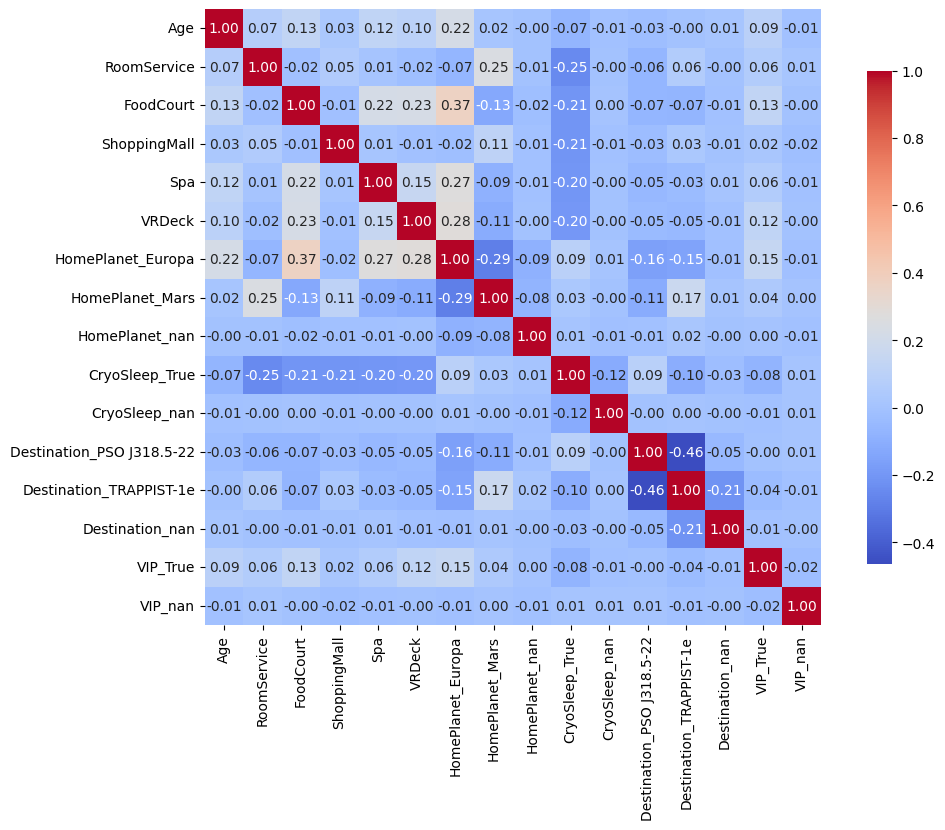

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [42]:
unscalled_fields = X.drop(columns=feature_ohe_names).select_dtypes(exclude=['object']).columns
unscalled_fields

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X[unscalled_fields])

StandardScaler()

In [45]:
X[unscalled_fields] = scaler.transform(X[unscalled_fields])

In [47]:
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_True,CryoSleep_nan,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_True,VIP_nan
count,8.514000e+03,8.512000e+03,8.510000e+03,8.485000e+03,8.510000e+03,8505.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,6.217458e-17,-1.419082e-17,-1.669901e-17,5.443168e-18,2.087376e-17,0.000000,0.245140,0.202347,0.023122,0.349362,0.024963,0.091568,0.680433,0.020936,0.022892,0.023352
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059,0.430195,0.401772,0.150300,0.476796,0.156020,0.288432,0.466336,0.143180,0.149568,0.151028
min,-1.989756e+00,-3.370254e-01,-2.842738e-01,-2.873167e-01,-2.737359e-01,-0.266098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.783417e-01,-3.370254e-01,-2.842738e-01,-2.873167e-01,-2.737359e-01,-0.266098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.261671e-01,-3.370254e-01,-2.842738e-01,-2.873167e-01,-2.737359e-01,-0.266098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.330730e-01,-2.665267e-01,-2.371097e-01,-2.426636e-01,-2.218284e-01,-0.225946,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.462968e+00,2.115309e+01,1.821709e+01,3.856422e+01,1.944053e+01,20.798803,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt_model = DecisionTreeClassifier(random_state=42)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
cross_val_score(dt_model, X_train, y_train, cv=5, scoring='roc_auc')

array([0.74759252, 0.76799669, 0.74158363, 0.76522328, 0.75027847])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs = GridSearchCV( 
    estimator=dt_model,
    param_distributions={
        'max_depth': range(1, 100),
        'min_samples_split': range(2, 110),
        'min_samples_leaf': range(1, 110),
    },
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 100),
                                        'min_samples_leaf': range(1, 110),
                                        'min_samples_split': range(2, 110)},
                   random_state=42, scoring='roc_auc', verbose=1)

In [151]:
gs.best_score_

np.float64(0.8586091615655889)

In [152]:
gs.best_params_

{'min_samples_split': 28, 'min_samples_leaf': 40, 'max_depth': 11}

In [153]:
y_pred = gs.best_estimator_.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [155]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)

(0.7745830937320299, 0.7869565217391304, np.float64(0.7740893012574773))

In [156]:
testmodel = DecisionTreeClassifier(random_state=42)
testmodel.fit(X_train, y_train)
y_pred_test = testmodel.predict(X_test)

In [157]:
accuracy_score(y_test, y_pred_test), f1_score(y_test, y_pred_test), roc_auc_score(y_test, y_pred_test)

(0.7251293847038528, 0.7413419913419913, np.float64(0.7245858896922845))

In [158]:
from sklearn.metrics import ConfusionMatrixDisplay

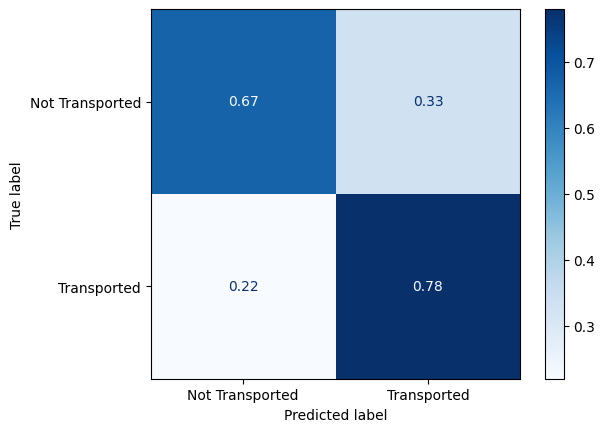

In [159]:
ConfusionMatrixDisplay.from_estimator(
    testmodel,
    X_test,
    y_test,
    display_labels=['Not Transported', 'Transported'],
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f'
)   

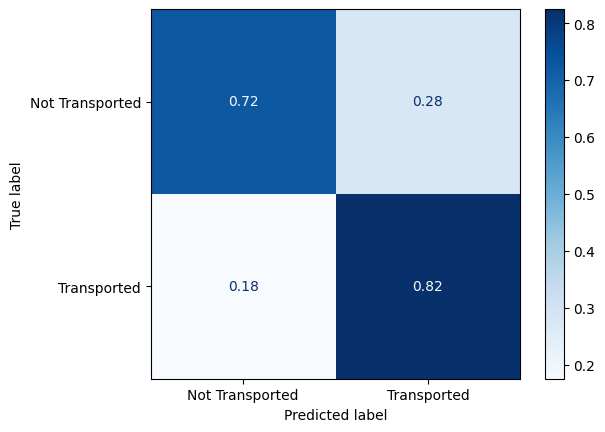

In [160]:
ConfusionMatrixDisplay.from_estimator(
    gs.best_estimator_,
    X_test,
    y_test,
    display_labels=['Not Transported', 'Transported'],
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f'
) 

In [162]:
pd.DataFrame({
    'Feature': X.columns,
    'Importance': gs.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

,Feature,Importance
9,CryoSleep_True,0.462104
5,VRDeck,0.122600
4,Spa,0.118164
2,FoodCourt,0.086232
1,RoomService,0.080608
6,HomePlanet_Europa,0.042067
0,Age,0.027744
7,HomePlanet_Mars,0.027463
3,ShoppingMall,0.021605
12,Destination_TRAPPIST-1e,0.006304


In [163]:
X = X.drop(columns=['VIP_nan', 'Destination_nan', 'VIP_True', 'CryoSleep_nan', 'HomePlanet_nan', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'])

In [164]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True
0,0.702095,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,1.0,0.0,0.0
1,-0.333233,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,0.0,0.0,0.0
2,2.013510,-0.272527,1.934922,-0.287317,5.634034,-0.223327,1.0,0.0,0.0
3,0.287964,-0.337025,0.511931,0.326250,2.655075,-0.097634,1.0,0.0,0.0
4,-0.885407,0.117466,-0.240833,-0.037590,0.223344,-0.264352,0.0,0.0,0.0


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
gs = RandomizedSearchCV( 
    estimator=dt_model,
    random_state=42,
    param_distributions={
        'max_depth': range(1, 100),
        'min_samples_split': range(2, 110),
        'min_samples_leaf': range(1, 110),
    },
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 100),
                                        'min_samples_leaf': range(1, 110),
                                        'min_samples_split': range(2, 110)},
                   random_state=42, scoring='roc_auc', verbose=1)

In [167]:
pd.DataFrame({
    'Feature': X.columns,
    'Importance': gs.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False)

,Feature,Importance
8,CryoSleep_True,0.445290
5,VRDeck,0.130156
4,Spa,0.122976
2,FoodCourt,0.089181
1,RoomService,0.078125
6,HomePlanet_Europa,0.042680
0,Age,0.034463
3,ShoppingMall,0.028689
7,HomePlanet_Mars,0.028439


In [168]:
y_pred = gs.best_estimator_.predict(X_test)

In [169]:
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)

(0.7699827487061529, 0.7821350762527233, np.float64(0.7695110045796195))

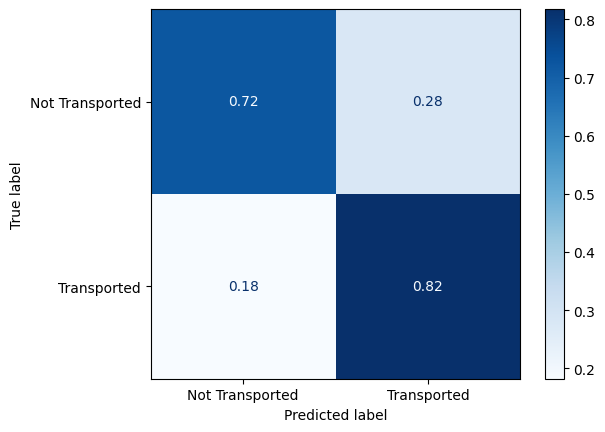

In [170]:
ConfusionMatrixDisplay.from_estimator(
    gs.best_estimator_,
    X_test,
    y_test,
    display_labels=['Not Transported', 'Transported'],
    cmap=plt.cm.Blues,
    normalize='true',
    values_format='.2f'
) 

In [171]:
final_data = pd.read_csv('./test.csv')

In [172]:
final_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [173]:
X = df.drop(columns=['Transported'])
y = df['Transported']
X = X.drop(columns=['PassengerId', 'Name', 'Cabin'])
X[feature_ohe_names] = ohe.transform(X[hot_objects])
X.drop(columns=hot_objects, inplace=True)
X[unscalled_fields] = scaler.transform(X[unscalled_fields])
X = X.drop(columns=['VIP_nan', 'Destination_nan', 'VIP_True', 'CryoSleep_nan', 'HomePlanet_nan', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'])

In [174]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True
0,0.702095,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,1.0,0.0,0.0
1,-0.333233,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,0.0,0.0,0.0
2,2.013510,-0.272527,1.934922,-0.287317,5.634034,-0.223327,1.0,0.0,0.0
3,0.287964,-0.337025,0.511931,0.326250,2.655075,-0.097634,1.0,0.0,0.0
4,-0.885407,0.117466,-0.240833,-0.037590,0.223344,-0.264352,0.0,0.0,0.0


In [175]:
y_result = gs.best_estimator_.predict(X)

In [177]:
accuracy_score(y, y_result), f1_score(y, y_result), roc_auc_score(y, y_result)

(0.7984585298516047, 0.8087336244541484, np.float64(0.7981111181103029))